In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
a=!kaggle datasets download -d tharun369/dogs-vs-cats

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Load and preprocess the data
train_data = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_set = train_data.flow_from_directory('/content/train',
                                          target_size=(224, 224),
                                          batch_size=32,
                                          class_mode='binary')

Found 8005 images belonging to 2 classes.


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(224, 224, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_set, epochs=10)

Epoch 1/10
251/251 [==============================] - 22s 65ms/step - loss: 6.5785 - accuracy: 0.5248
Epoch 2/10
251/251 [==============================] - 16s 65ms/step - loss: 4.0696 - accuracy: 0.5402
Epoch 3/10
251/251 [==============================] - 19s 76ms/step - loss: 3.1339 - accuracy: 0.5565
Epoch 4/10
251/251 [==============================] - 17s 66ms/step - loss: 2.5109 - accuracy: 0.5809
Epoch 5/10
251/251 [==============================] - 19s 73ms/step - loss: 2.8978 - accuracy: 0.5810
Epoch 6/10
251/251 [==============================] - 16s 64ms/step - loss: 1.8944 - accuracy: 0.5891
Epoch 7/10
251/251 [==============================] - 18s 70ms/step - loss: 1.2065 - accuracy: 0.6162
Epoch 8/10
251/251 [==============================] - 16s 65ms/step - loss: 1.1117 - accuracy: 0.6185
Epoch 9/10
251/251 [==============================] - 17s 70ms/step - loss: 0.8550 - accuracy: 0.6457
Epoch 10/10
251/251 [==============================] - 16s 64ms/step - loss: 0.765

In [ ]:

# Evaluate the model on the test set
test_data = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_set = test_data.flow_from_directory('//content/test',
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='binary')

test_loss, test_accuracy = model.evaluate(test_set)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Found 2023 images belonging to 2 classes.
64/64 [==============================] - 4s 63ms/step - loss: 0.6668 - accuracy: 0.5927
Test loss: 0.6668209433555603
Test accuracy: 0.5926841497421265


In [ ]:
history = model.fit(train_set,epochs=10,validation_data=test_set)


In [ ]:
import matplotlib.pyplot as plt



In [ ]:
import cv2

In [ ]:
image_path = r'C:\Users\GUDDU SINGH\Desktop\dogg.jpg'
test_img = cv2.imread('/content/dogg.jpg')

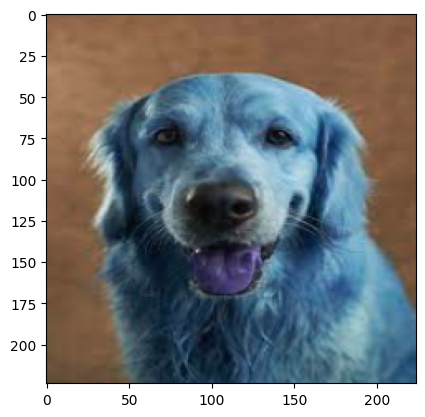

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img = test_img.reshape((1,224,224,3))

In [ ]:
model.predict(test_img)

1/1 [==============================] - 0s 49ms/step


array([[1.]], dtype=float32)

In [ ]:
if model.predict(test_img)[0][0]==0:
  print('cat')
else:
  print("dog")

1/1 [==============================] - 0s 18ms/step
dog


In [ ]:
test_img.shape


(224, 224, 3)

In [ ]:
test_img = cv2.imread('/content/kiti.jpg')

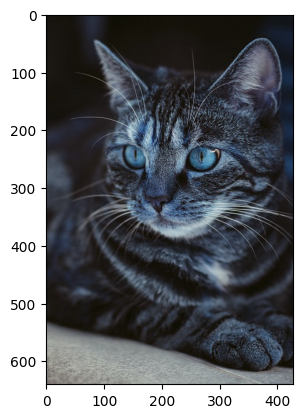

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(224,224))

In [ ]:
test_img = test_img.reshape((1,224,224,3))

In [ ]:
model.predict(test_img)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

In [ ]:
if model.predict(test_img)[0][0]==0:
  print('cat')
else:
  print("dog")

1/1 [==============================] - 0s 16ms/step
dog
